## End to End EDA on Titanic Dataset

### 1. Import Library

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
print("Libraries imported.")

Libraries imported.


In [2]:
!git clone https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset 
print("Data Downloaded.")

Data Downloaded.


fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


### 2. Data Loading and Understanding

In [3]:
df = pd.read_csv('21-Days-21-Projects-Dataset\Datasets\Titanic-Dataset.csv')
print("Data imported. Printing first 5 rows.")

df.head()


Data imported. Printing first 5 rows.


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
print("Printing last 5 rows")
df.tail()

Printing last 5 rows


PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [5]:
print("Getting summary of the dataset")
print("Shape of data: ",df.shape)
df.info()

Getting summary of the dataset
Shape of data:  (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Inference:
- This data contain 891 sample and 12 attributes
- 2 missing values in column Embarked
- some missing values in Age
- major values missing in Cabin

In [6]:
print("Getting statistics for numerical columns:")
df.describe()

Getting statistics for numerical columns:


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

#### Inference:
- Only ~38.38% people could survive
- People present there ranges by age from 5 months to 80 years old. 
- Most of the people were travelling alone.
- Fare ranges from 0 to 512 with a mean of 32 represents there are outliers present in the data.

### 3. Data Cleaning

- first we need to fillup the missing values
- filling numerical values with mean/ median and categorical with mode
- some column may require custom value filling such as None, depnding on Missing data type

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Age Distribution')

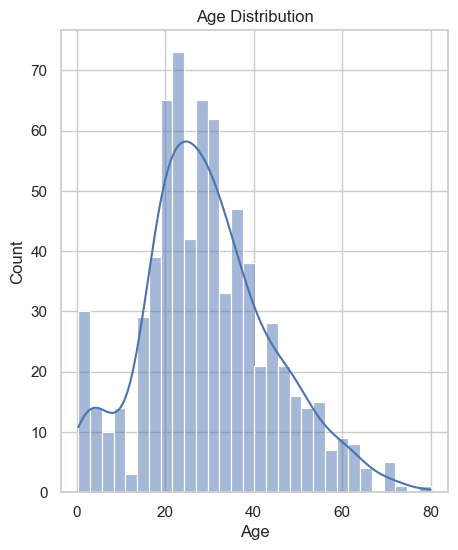

In [8]:
fig,ax = plt.subplots(figsize=(5,6))
sns.histplot(ax=ax, data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

- we will replace the missing age values with median, as median is less affected than mean in right-skewed data.

In [9]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

print("Null Age replaced with median value.")

print("After replacement, missing values:")
df[['Age','Embarked','Cabin']].isna().sum()

Null Age replaced with median value.
After replacement, missing values:


Age           0
Embarked      2
Cabin       687
dtype: int64

- Since Embarked is a categorical data, it will be filled up with mode value.

In [10]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("After replacement, missing values:")
df[['Age','Embarked','Cabin']].isna().sum()

After replacement, missing values:


Age           0
Embarked      0
Cabin       687
dtype: int64

- Since cabin has >50% data missing, it is better insted of imputing the column, we replace with another column representing if passenger has cabin or not

In [12]:
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [13]:
df['Has_cabin'] = df['Cabin'].notna().astype('int')
df.drop('Cabin', axis=1, inplace=True) # Drop the original column

In [14]:
df['Has_cabin'].value_counts()

Has_cabin
0    687
1    204
Name: count, dtype: int64

In [15]:
print("After replacement, missing values:")
df[['Age','Embarked','Has_cabin']].isna().sum()

After replacement, missing values:


Age          0
Embarked     0
Has_cabin    0
dtype: int64

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_cabin      0
dtype: int64

Since the Data is cleaned, lets proceed for Analysis, starting with univariate and then Bivariate

### 4. Univariate Analysis

Analyzing Categorical Features:


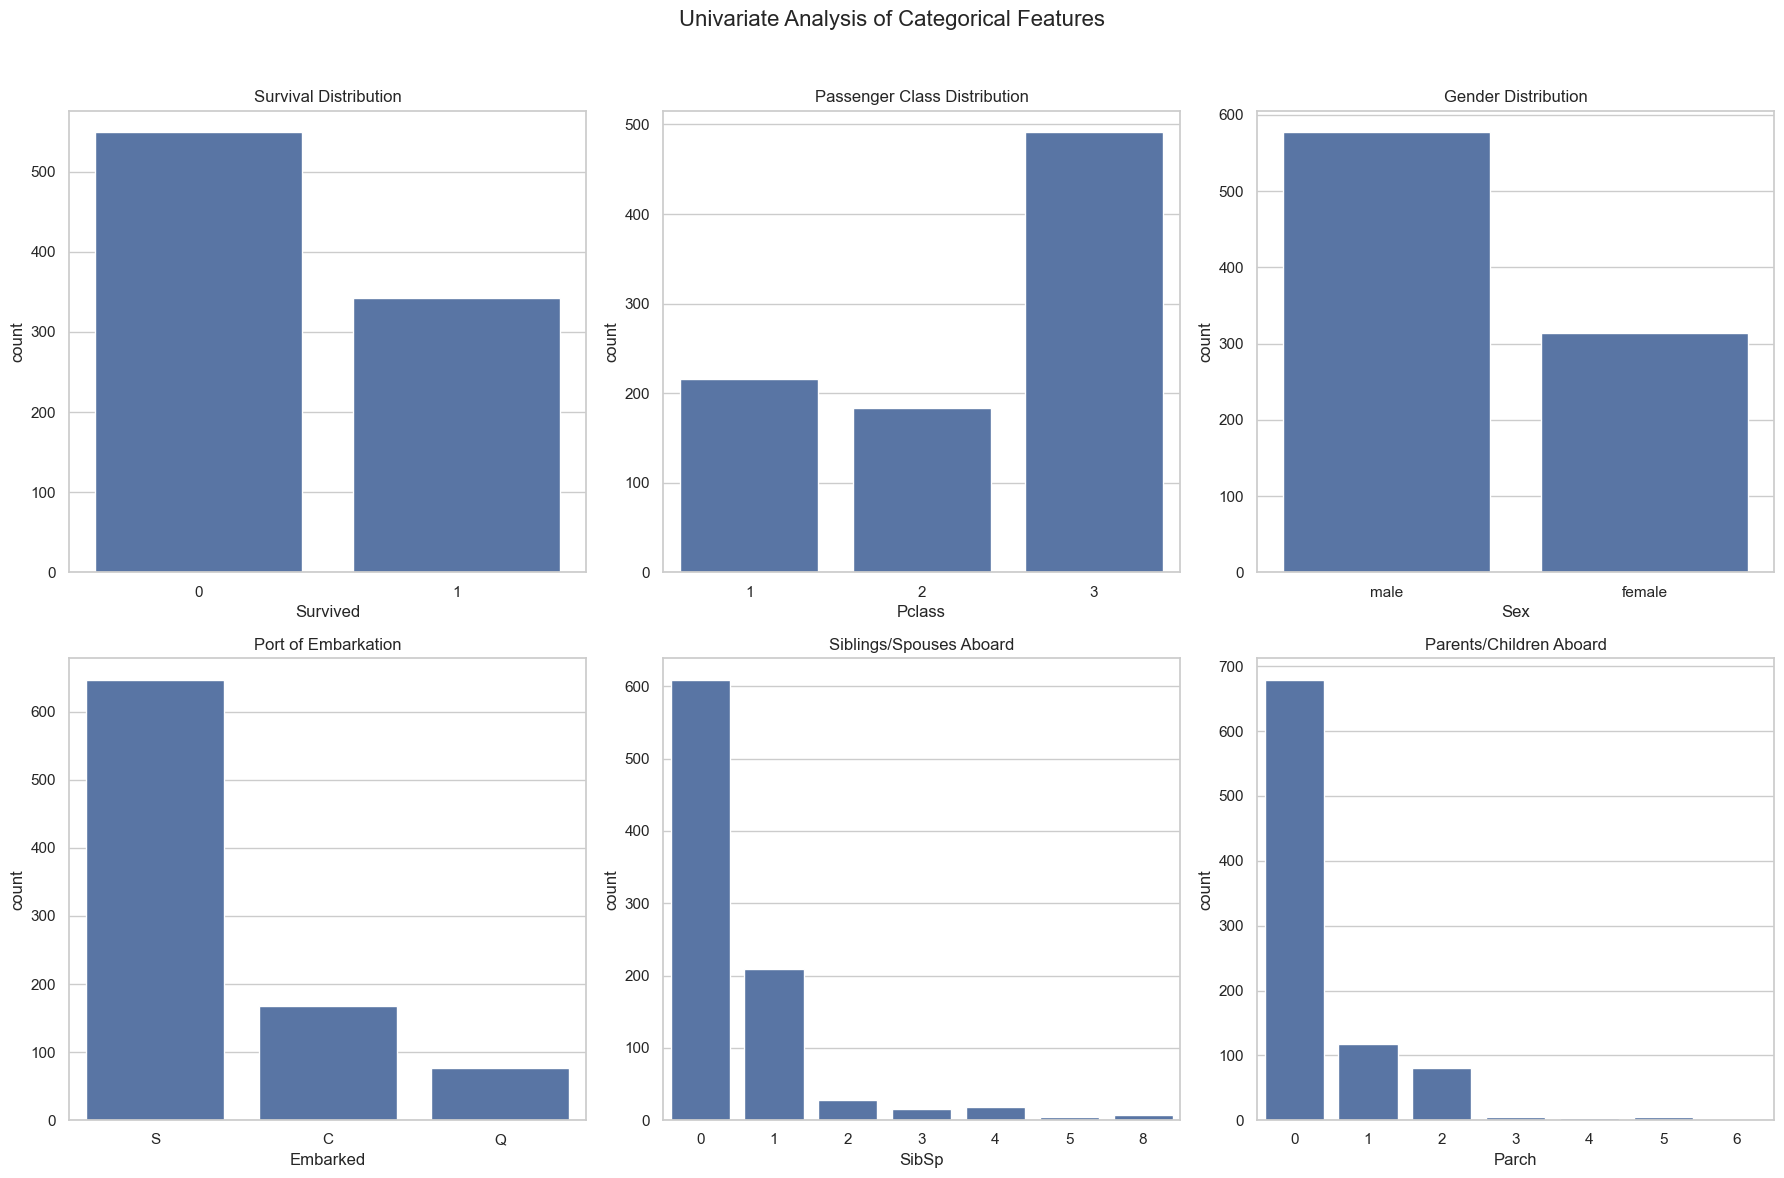

In [17]:
print("Analyzing Categorical Features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
sns.countplot(ax=axes[0, 0], x='Survived', data=df).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Inference
- Less than 50% people survived.
- Most people were class 3 passenger as compared to class 1 and class 2.
- There were more male than females onboard.
- Southampton ('S') recorded the highest embarkment to Titanic.
- Most passenger were travelling alone.


Analyzing Numerical Features:


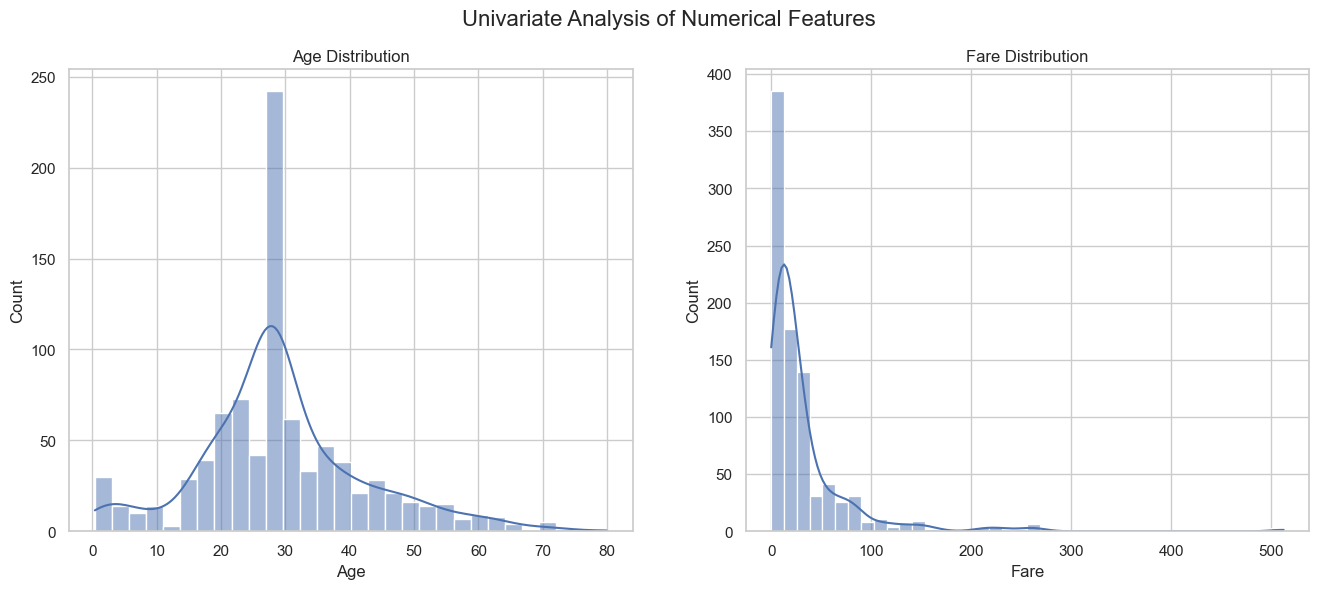

In [18]:

print("\nAnalyzing Numerical Features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

#### Inference
- Most people onboard were from age group 20-30, it also might be a result of missing age being replaced with median value.
- Fare is highly skewed, There were a little number of people preferred luxurious travel, whereas a huge number of people prefered economy (<50).

### 5. Bivariate Analysis

Bivariate Analysis: Feature vs. Survival


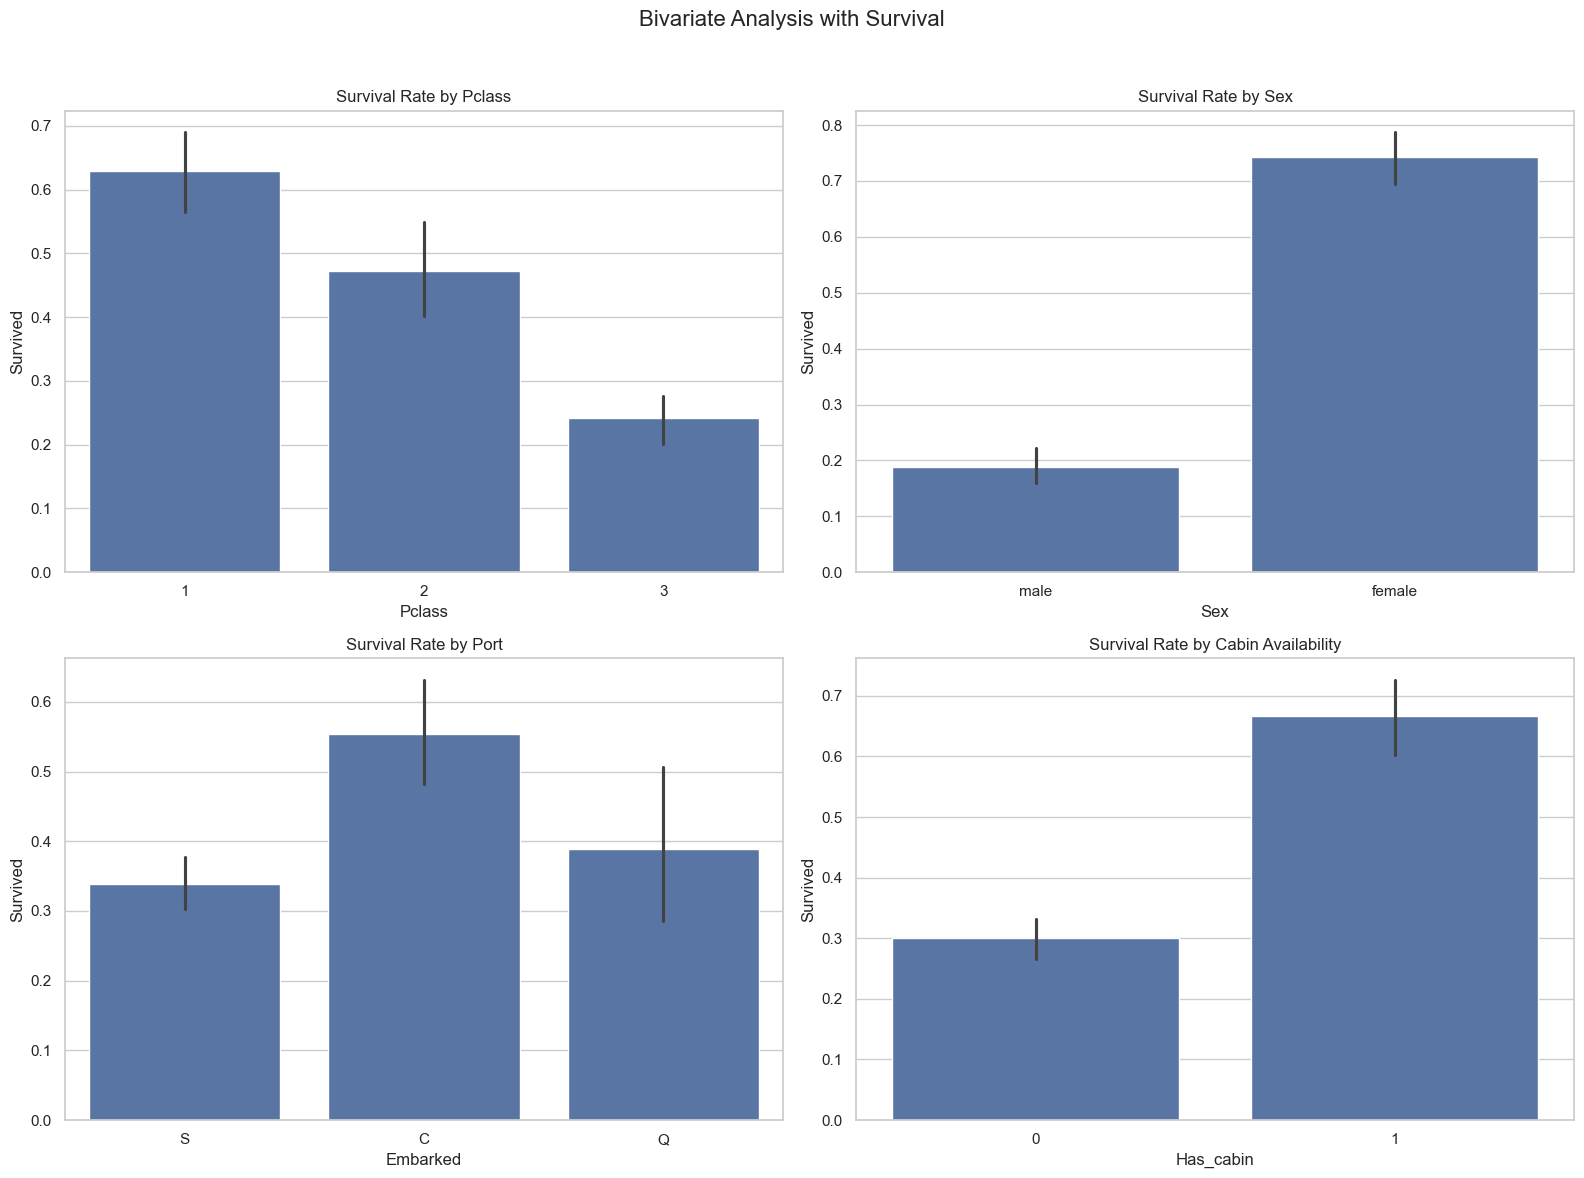

In [19]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Inference
- 1st class passenger has a clearly greater than 60% chance of survival, while 3rd class passenger has a chance of around 25% to survive.
- As per sex ratio of survived people, less than 20% male could survive, whereas ~75% women survived. We may say that most men were busy helping women and children in rescue.
- The plots suggests, the people who embarked from station 'C' has more survival chances.
- Passenger with cabin has higher chances of survival than those without cabin.

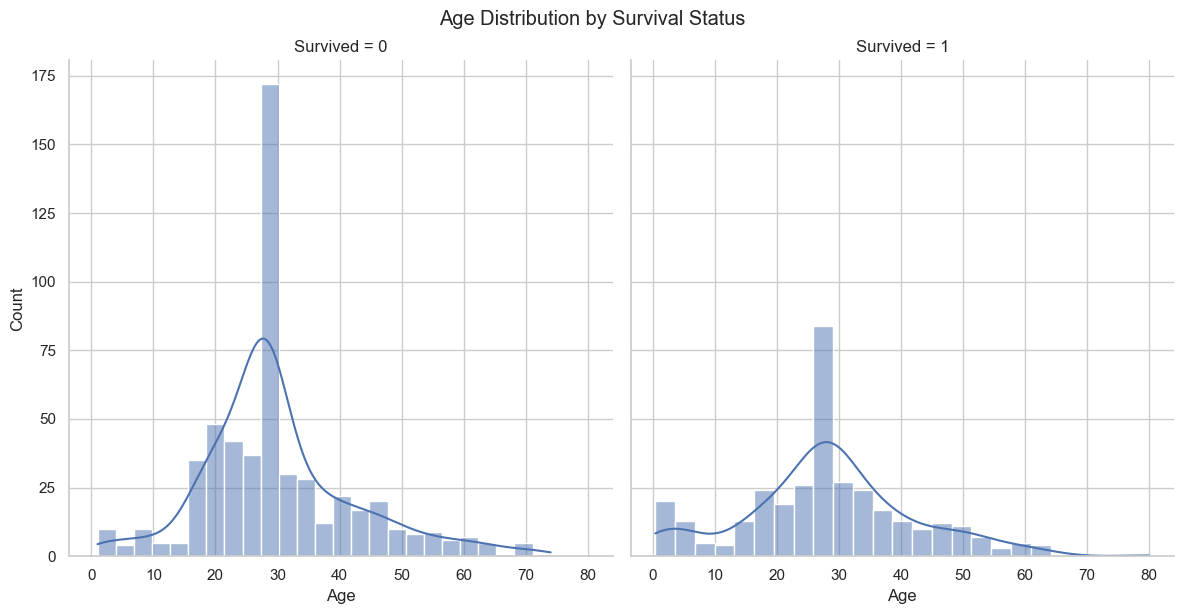

In [20]:
# Age distribution by Survival Status
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

#### Inference
- Children had higher chances of survival.
- A large number of youths could not survive.
- The oldest person could not survive.

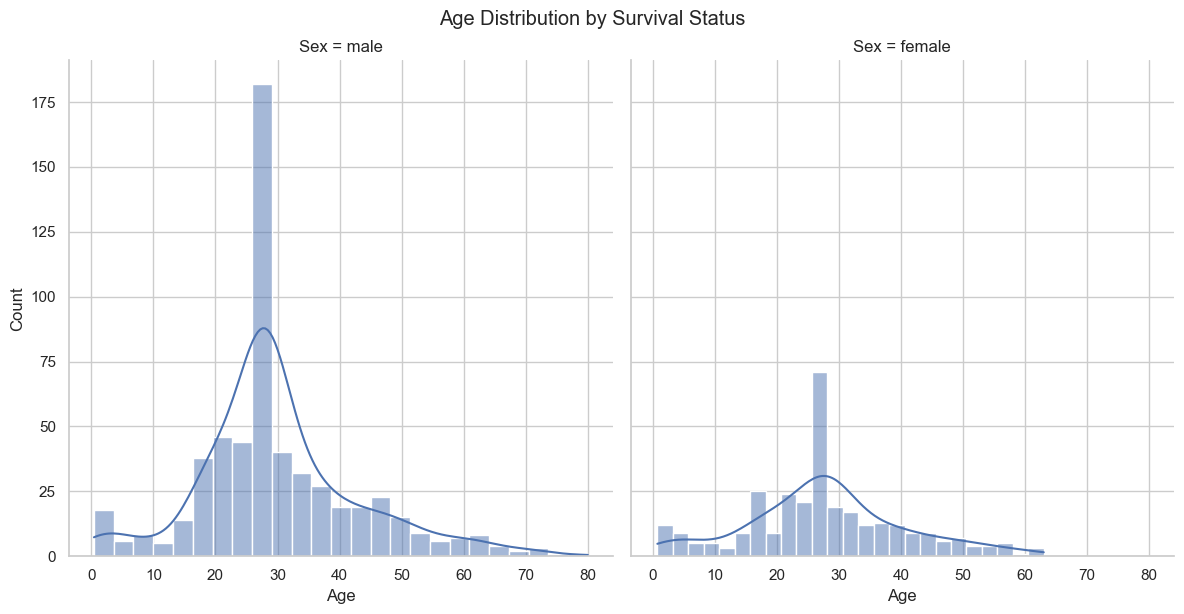

In [21]:
# Age distribution by Survival Status
g = sns.FacetGrid(df, col='Sex', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

#### Inference
- Overall number of males are largen than female from each age group.
- The oldest person present on Titanic, who unfortunately could not survive,  was a male.

### Outlier Analysis of Fare

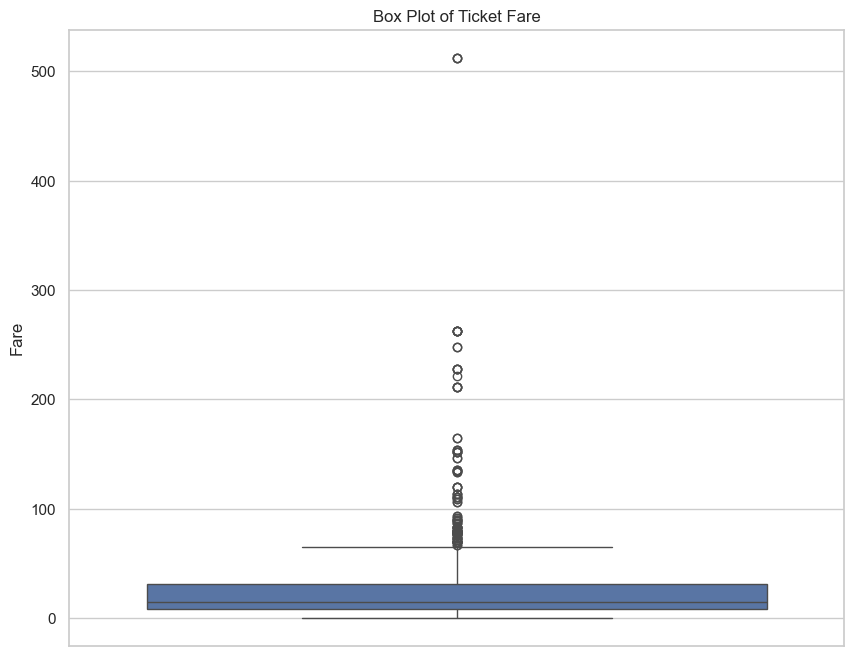

In [22]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

#### Inference
- From the box plot, 1 ticket was booked with price >500.
- All the people except a few booked ticket with price <75.
- The plot shows the presence of a significant number of outliers.

### 6. Feature Engineering

## some common techniques:
- creating a column from information of multiple columns
- Extracting information from a column

In [23]:
# 1. Create a 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 for the person themselves

# 2. Create an 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

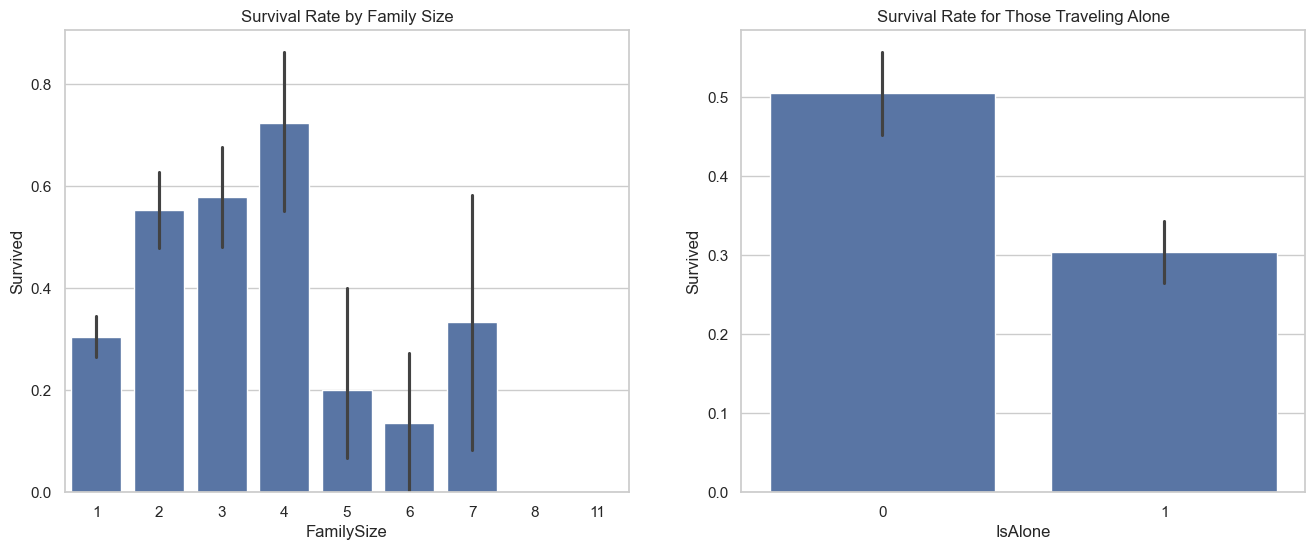

In [24]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

#### Inference:
- Small family with member size of 2-4 had higher survival chance whereas those with members from 5-7 had lesser chance to survive.
- Alone passenger were having lower chances of survival.

##### Extraction of titles from name

In [25]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

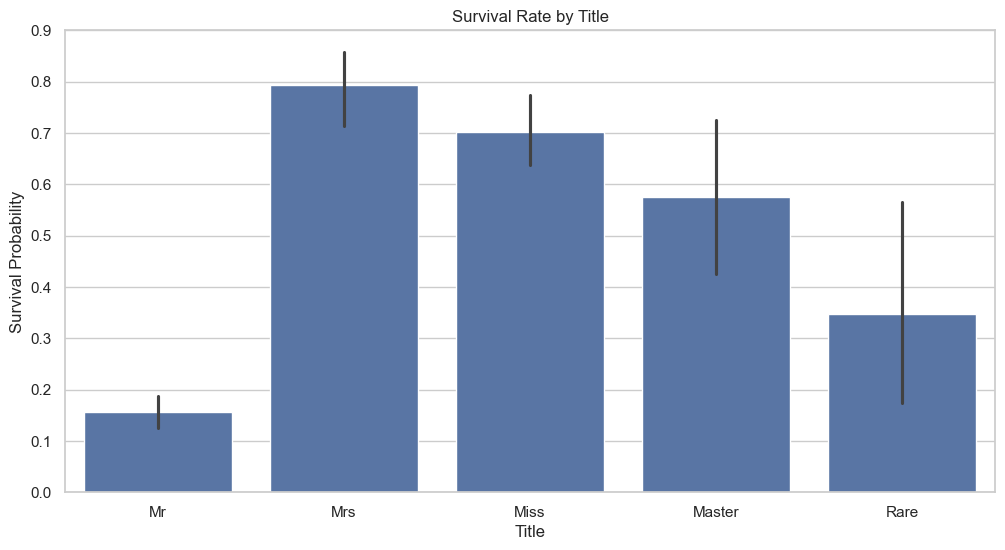

In [26]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

#### Inference:
- Ladies (married and unmarried) had a higher chance of survival.
- Young boys had lesses chance of survival.
- Men had least survival chanes.
- Rare (Special category people) had survival chance more than men but less than young boys.

### 7. Multivariate Analysis


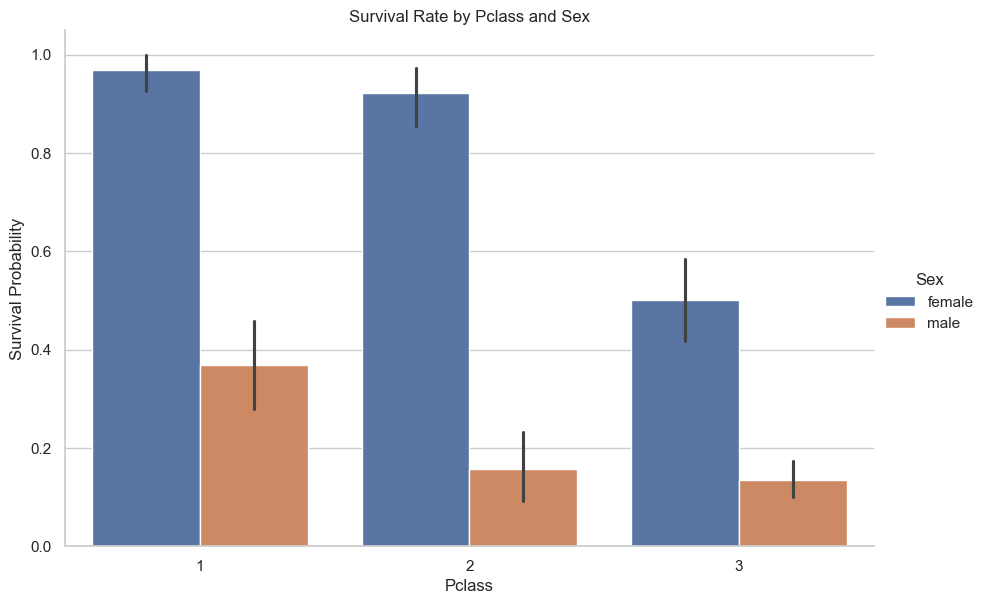

In [27]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

#### Inference:
- Females had higher survival chance irrespective of class.

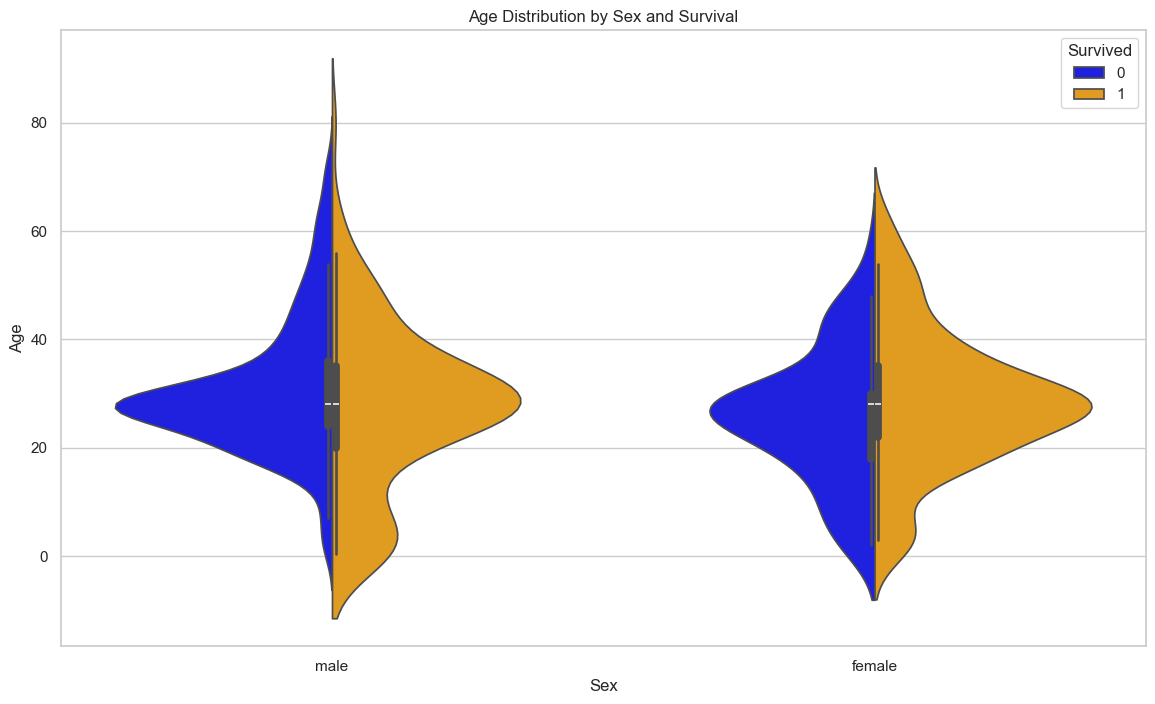

In [28]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

#### Inference:
- most of the young survivors were boys.
- among non survivers, men aged 20-30 has higher frequency.
- survival of females nearly similar, but showing better chances of survival for all age groups.

#### Correlation Analysis

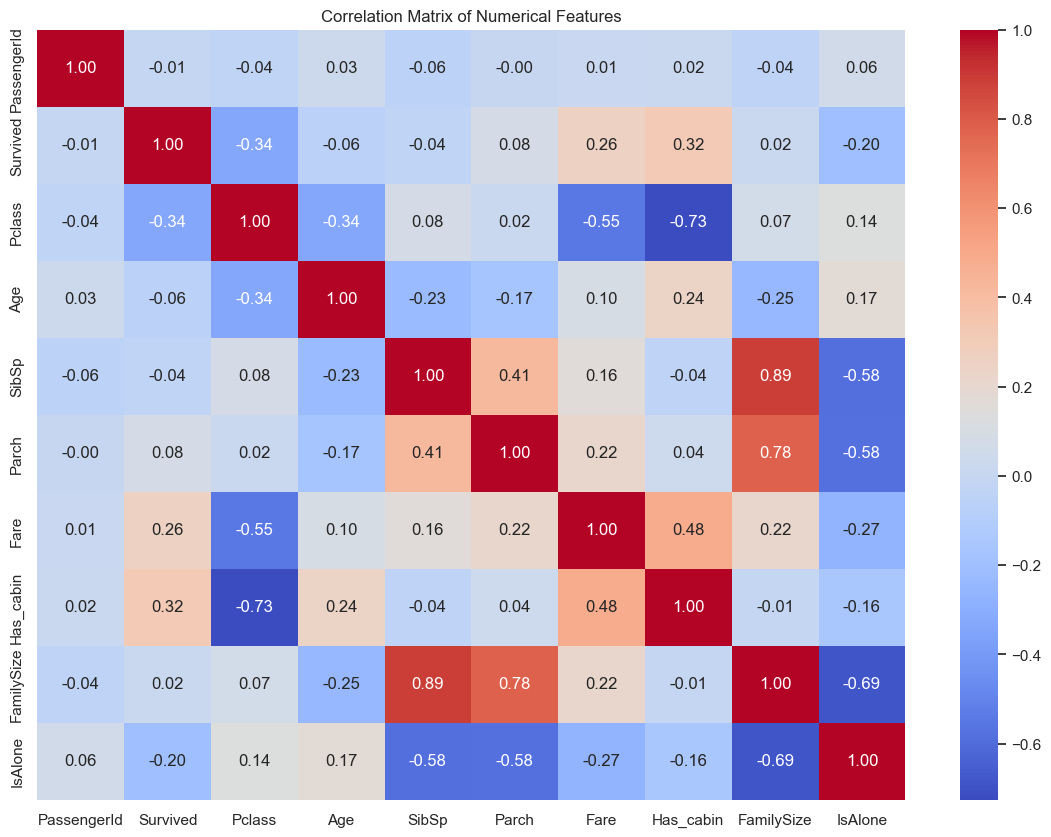

In [29]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Inference:
- Chance of Survival is directly correlated to Fare and having a cabin.
- Chance of Survival is high, higher the class you belongs to.
- Fare is directly corelated to higher class and having a cabin.
- Family size is directly related to Parent, children, sibling and spouse, as it is created from them.

# Task

In [32]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 117.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
# Save the report to an HTML file
profile.to_file("sample.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]